# Part II - (Presentation On Prosper Loan Data )
## by (Paul Boadu Asamoah)

## Investigation Overview


In this analysis, I will explore the factors and patterns in the creditworthiness of borrowers and the borrowing trend of Prosper Loan Business.

## Dataset Overview

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
data = pd.read_csv("prosperLoanData.csv")

In [3]:
# Select the important variables
df = data.loc[:, ["Term", 
           "LoanStatus", 
           "BorrowerAPR", 
           "BorrowerRate", 
           "ProsperRating (Alpha)", 
           "ListingCategory (numeric)", 
           "BorrowerState", 
           "Occupation", 
           "EmploymentStatus", 
           "EmploymentStatusDuration", 
           "IsBorrowerHomeowner", 
           "CreditScoreRangeLower", 
           "CreditScoreRangeUpper", 
           "CurrentCreditLines", 
           "DebtToIncomeRatio", 
           "IncomeRange", 
           "StatedMonthlyIncome", 
           "LoanOriginalAmount", 
           "LoanOriginationDate", 
           "MonthlyLoanPayment"]]

In [4]:
# Rename ProsperRating (Alpha) and ListingCategory (numeric) columns using Pandas rename function
df.rename(columns = {"ProsperRating (Alpha)" : "ProsperRating", 
                     "ListingCategory (numeric)" : "ListingCategory"},
          inplace = True)

In [5]:
# Change datatype of "LoanOriginationDate" to datetime
df.LoanOriginationDate = pd.to_datetime(df["LoanOriginationDate"])

In [6]:
# Asign the columns into a single list
col = ["Term", 
       "LoanStatus", 
       "ProsperRating", 
       "BorrowerState", 
       "IncomeRange", 
       "EmploymentStatus"]

# Define a function to change the datatype of the columns to categorical
def change_dtype(df, col):
    """Take df as dataframe and col as column and changes the 
    datatype of the column to categorical datatype"""
    for item in col:
        df[item] = df[item].astype("category")
        
# Call the function
change_dtype(df, col)

In [7]:
# Replace the values from 0 - 20 its actual listing 
df.ListingCategory.replace({0 : "Not Available", 
                            1 : "Debt Consolidation", 
                            2 : "Home Improvement", 
                            3 : "Business", 
                            4 : "Personal Loan", 
                            5 : "Student Use", 
                            6 : "Auto", 
                            7: "Other", 
                            8 : "Baby&Adoption", 
                            9 : "Boat", 
                            10 : "Cosmetic Procedure", 
                            11 : "Engagement Ring", 
                            12 : "Green Loans", 
                            13 : "Household Expenses", 
                            14 : "Large Purchases", 
                            15 : "Medical/Dental", 
                            16 : "Motorcycle", 
                            17 : "RV", 
                            18 : "Taxes", 
                            19 : "Vacation", 
                            20 : "Wedding Loans"},
                          inplace = True)

# Change the dtype from object to categorical using .astype()
df.ListingCategory = df.ListingCategory.astype("category")

In [8]:
# Drop missing values aclose rows 
df.dropna(axis = 0, inplace = True)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## The distribution of borrowers Loan Status

The Loan Status distribution provides information on the number of borrowers in various categories, such as those who has completed their loan, those who are still servicing it, and those who have defaulted, charged off, or cancelled their loan.

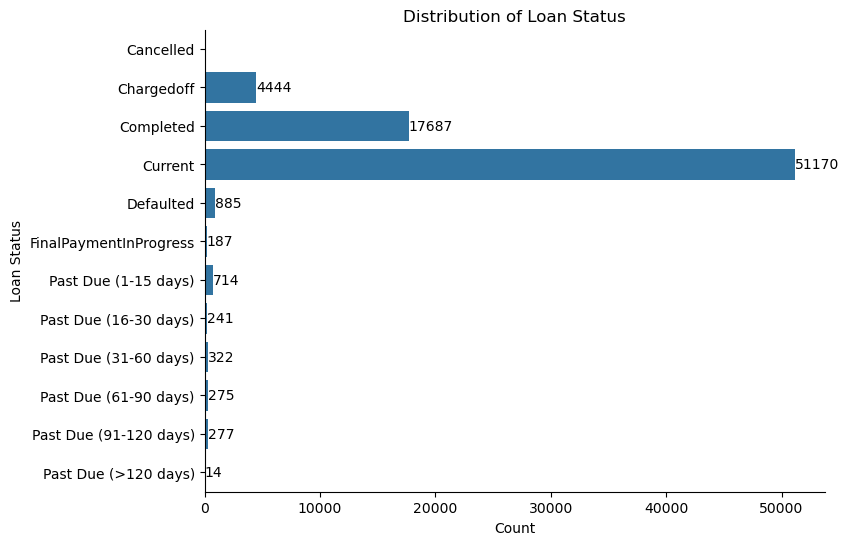

In [9]:
## Show the distribution of LoanStatus using seaborn
# Order values
freq = df.LoanStatus.value_counts().index

# Set basecolor
basecolor = sns.color_palette()[0]

# set figure ize
plt.figure(figsize = (8,6))

# Plot countplot
ax = sns.countplot(y = "LoanStatus", 
                   data = df, 
                   color = basecolor)

# Set annotation
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
        ax.annotate(f"{width:0.0f}", 
                    xy = (left + width, bottom + height), 
                    xytext=(left + width + 2, bottom + height/2),
                    ha = "left", 
                    va = "center",
                    fontsize = 10) 

# Label the plot
plt.ylabel("Loan Status")
plt.xlabel("Count")
plt.title("Distribution of Loan Status")
sns.despine()

# show plot
plt.show()

## Prosper Rating vs Is Borrower Homeowner

There are a sizable proportion of borrowers are rated C, with a relatively even split between those who own a home and those who do not. Borrowers with an A credit score are more common, with a higher percentage owning a home. Borrowers with an AA credit rating are relatively uncommon, and the majority own a home. This information suggests that more research into IsBorrowerHomeowner is necessary.

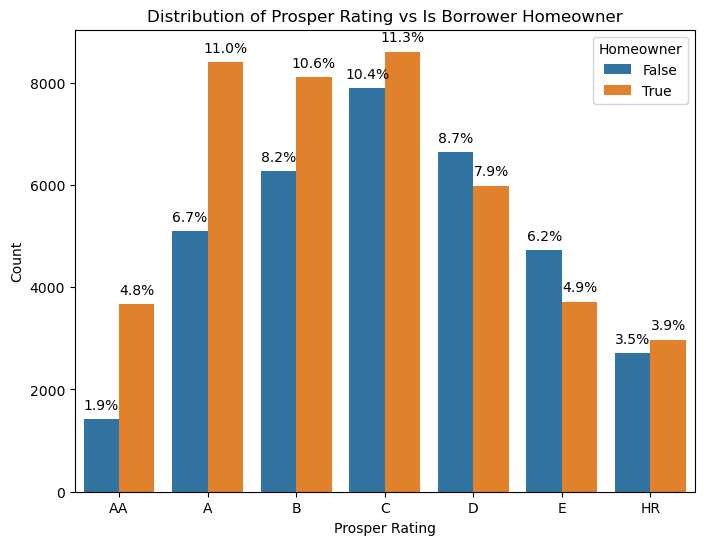

In [10]:
# Credit rating in order
credit_rating = ["AA", "A", "B", "C", "D", "E", "HR"]

# Set the figure size
plt.figure(figsize = (8, 6))

# Create a count plot
ax = sns.countplot(data = df, 
                   order = credit_rating,
                   x = "ProsperRating", 
                   hue = "IsBorrowerHomeowner")

# Calculate total value of bar chart
total = sum([p.get_height() for p in ax.patches])

# Set annotation as percentage
for p in ax.patches:
    percentage = 100 * p.get_height() / total
    ax.annotate(f"{percentage:.1f}%",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = "center",
                va = "center",
                xytext = (0, 10),
                textcoords = "offset points")

# set the title and legend of the plot
plt.title("Distribution of Prosper Rating vs Is Borrower Homeowner")
plt.legend(title="Homeowner", labels=["False", "True"])
plt.ylabel("Count")
plt.xlabel("Prosper Rating")

# Display plot
plt.show()

## Trend of Monthly Loan Payment by Term of Loan over the Years

The evolution of loan terms of the business demonstrats that the company initially offered only 36-month loan terms before introducing 12-month and 60-month terms in 2010. There is a significant and steady increase in the monthly loan payment since the introduction of the 12-month loan term, which has continued until 2013. Similarly, the 36-month loan term has seen consistent increases in loan payments from 2009 to the present.

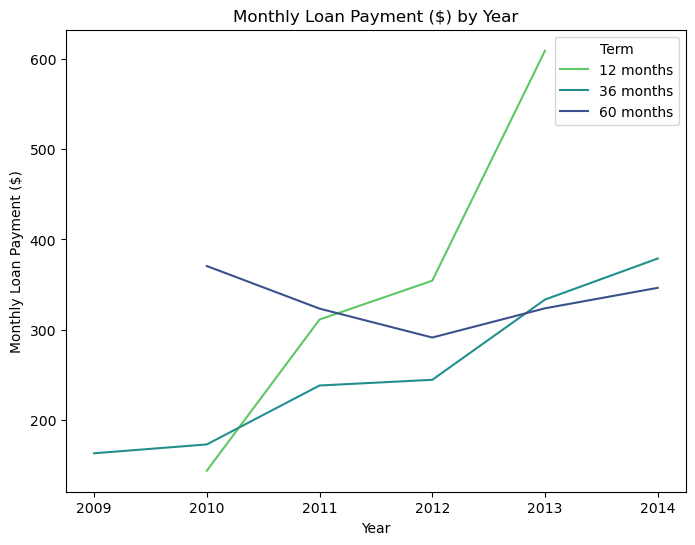

In [12]:
# Extract the year from LoanOriginationDate
df["Year"] = df["LoanOriginationDate"].dt.year

# Set figure size
plt.figure(figsize = (8, 6))
# Create line plot
sns.lineplot(x = "Year", 
             y = "MonthlyLoanPayment", 
             hue = "Term", 
             data = df,
             palette = "viridis_r",
             ci = None)
# Title the plot and add legend
plt.title("Monthly Loan Payment ($) by Year")
plt.legend(title = "Term", labels = ["12 months", "36 months", "60 months"])
plt.ylabel("Monthly Loan Payment ($)")

# Display plot
plt.show()

## Relationship Between LoanOriginalAmount and MonthlyLoanPayment Over EmploymentStatus

The relationship between MonthlyLoanPayment and LoanOriginalAmount across EmploymentStatus reveals a high correlation for employed borrowers. The majority of this group, representing the largest population, has loan amounts up to $25,000 and monthly payments of $1,000. Similarly, full-time borrowers and others make up the second and third largest populations. Furthermore, part-time, retired, and self-employed borrowers, who make up a small proportion of the borrower population, have a strong positive correlation. Notably, there is a subset of unemployed people who constitute a distinct population.

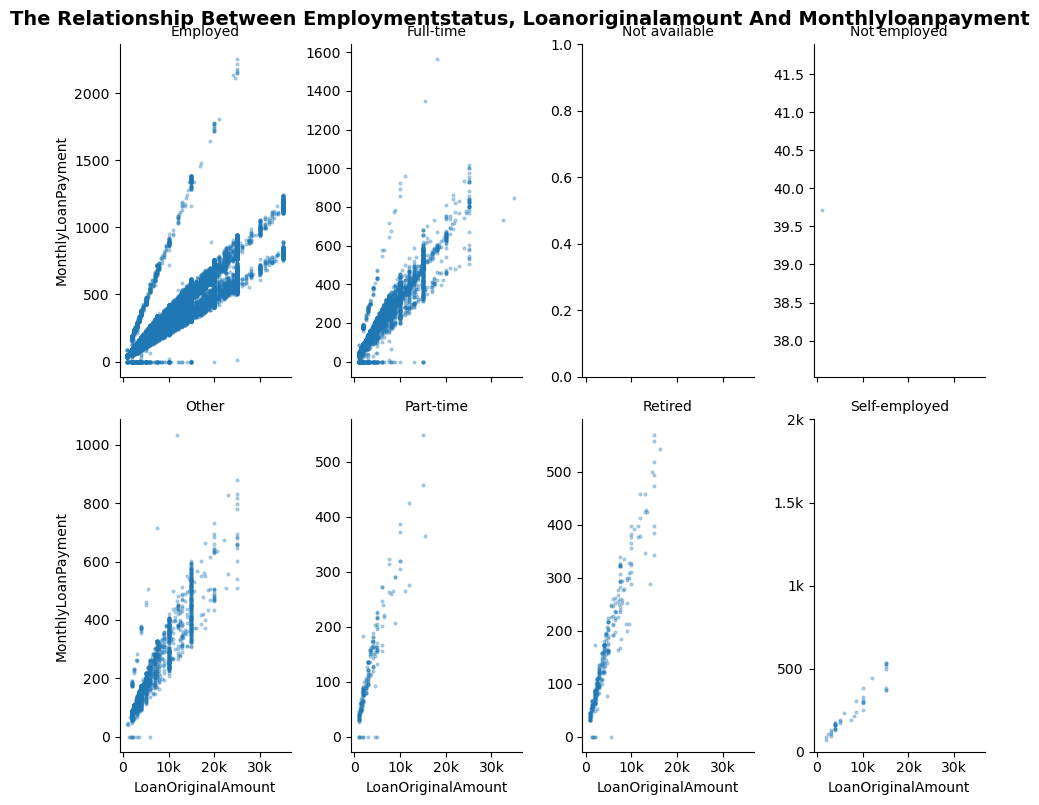

In [13]:
# Create FacetGrid
g = sns.FacetGrid(data = df, 
                  col = "EmploymentStatus", 
                  height = 4, 
                  sharey = False,
                  aspect = 0.6, 
                  col_wrap = 4)
# Map the scattere plot
g.map(plt.scatter, "LoanOriginalAmount", "MonthlyLoanPayment", alpha = 0.3, s = 4)

# Set each figure titel short
g.set_titles("{col_name}")

plt.yticks([0, 500, 1000, 1500, 2000], 
           [0, 500, "1k", "1.5k", "2k"])
plt.xticks([0, 10000, 20000, 30000], 
           [0, "10k", "20k", "30k"])

plt.suptitle("The Relationship between EmploymentStatus, LoanOriginalAmount and MonthlyLoanPayment".title(), y = 1, fontsize = 14, weight = "bold")
# display plot
plt.show()

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 898998 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
